# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES** 

### Here is a Basic Summary of the Data Set

In [3]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# the shape of an traffic sign image
image_shape = X_train[0].shape

# unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

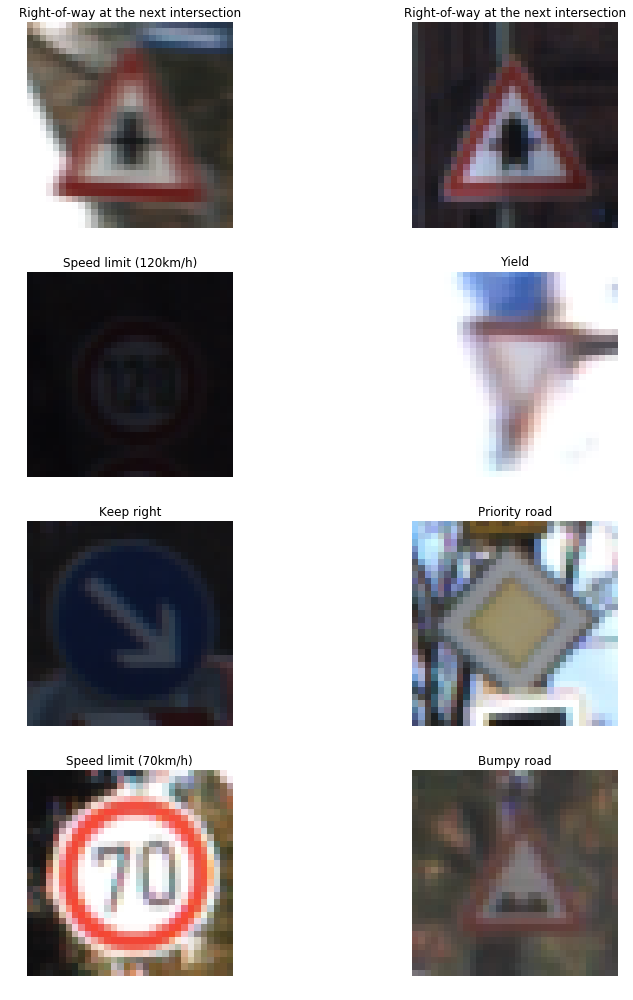

In [4]:
### Data exploration visualization code
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import csv

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axis = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axis = axis.ravel()
    for index, title in zip(range(len(figures)), figures):
        axis[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axis[index].set_title(labels[index])
        else:
            axis[index].set_title(title)
            
        axis[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S55')], delimiter=',')
    
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index]
    
plot_figures(figures, 4, 2, labels)

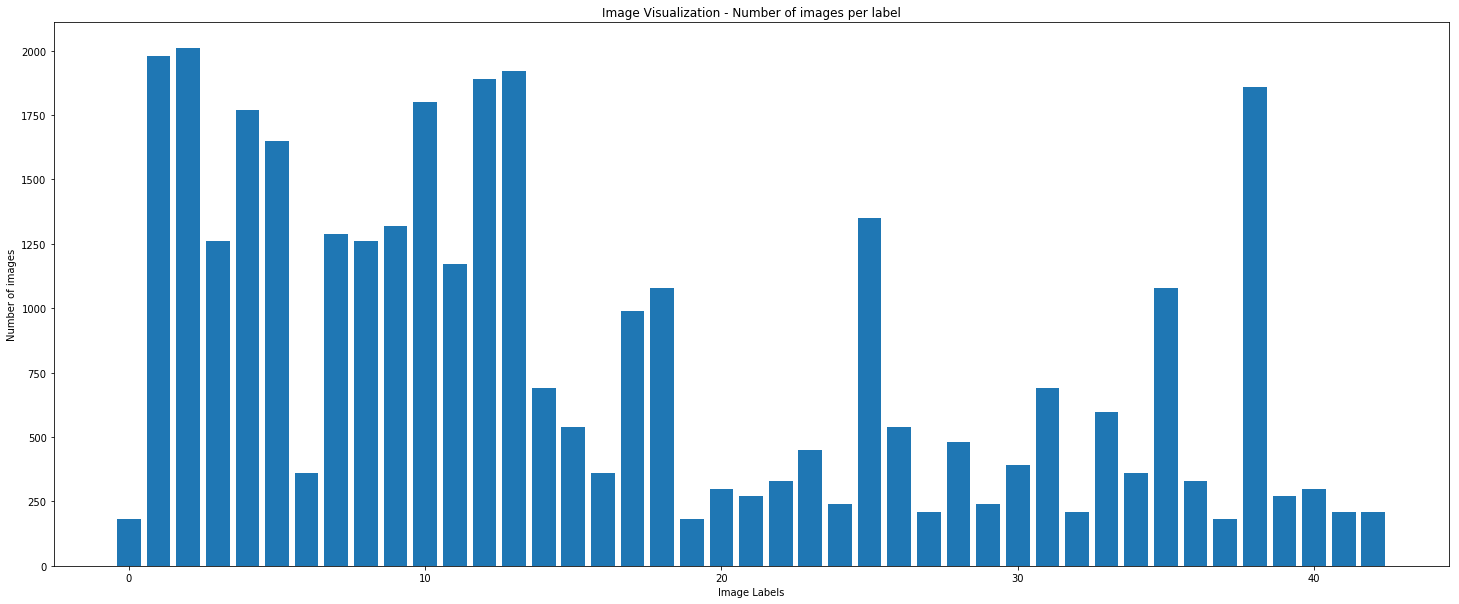

In [5]:
#Plotting a bar graph to count the number of images per label from the training set
#Setting the x and y axis arrays
x_plot = np.array(range(0,len(set(y_train))))
y_plot = np.int_(np.zeros(len(set(y_train))))
#Calculating the number of images per label and storing in y_plot array
count = 0
for t in range(0,len(x_plot)):
    temp = x_plot[t]
    count = 0
    for r in range(0,len(y_train)):
        if y_train[r]==temp:
            count = count+1
        else:
            count = count
    y_plot[t] = count

#Plotting the bar graph using plt.bar command
fig = plt.subplots(figsize=(25,10))
plt.bar(x_plot, y_plot)
plt.xlabel('Image Labels')
plt.ylabel('Number of images')
plt.title('Image Visualization - Number of images per label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
from sklearn.utils import shuffle

def rgb_to_grayScale(images):
    return np.sum(images/3, axis=3, keepdims=True)

# Convert to grayscale
X_train = rgb_to_grayScale(X_train)
X_test = rgb_to_grayScale(X_test)
X_valid = rgb_to_grayScale(X_valid)

image_depth_channels = X_train.shape[3]

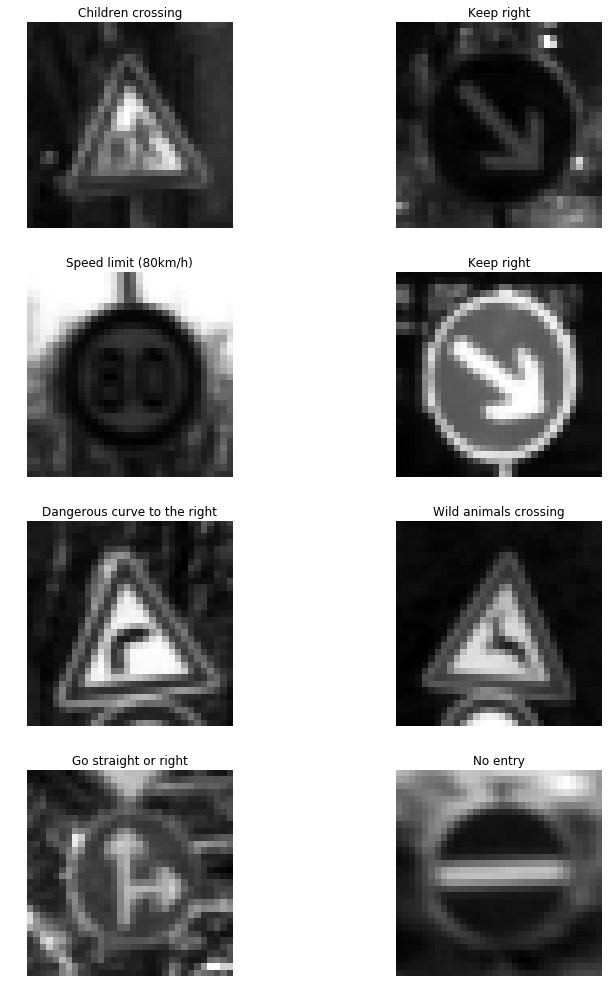

In [7]:
number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
plot_figures(figures, 4, 2, labels)

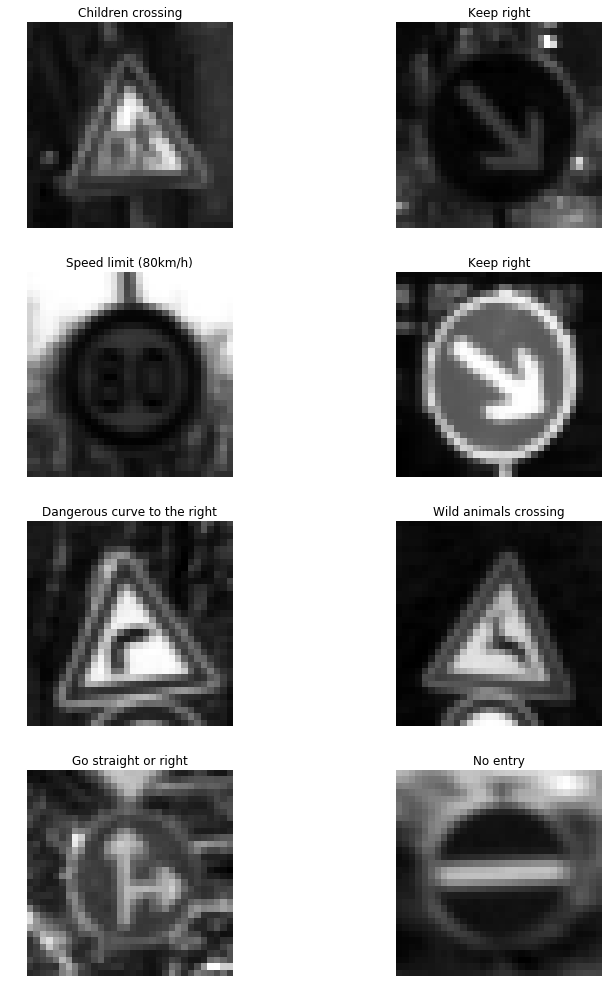

In [8]:
X_train_normalized = X_train/127.5-1
X_test_normalized = X_test/127.5-1

number_to_stop = 8
figures = {}
count = 0
for i in random_signs:
    labels[count] = name_values[y_train[i]][1].decode('ascii')
    figures[count] = X_train_normalized[i].squeeze()
    count += 1;
    
plot_figures(figures, 4, 2, labels)

X_train = X_train_normalized
X_test = X_test_normalized

### Model Architecture

In [9]:
import tensorflow as tf
#Setting up the model architecture - using a Le-Net architecture
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    print(x.shape)
    return tf.nn.relu(x)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    w_cnv1 = tf.Variable(tf.truncated_normal([5,5,image_depth_channels,6],mean = mu, stddev = sigma))
    b_cnv1 = tf.Variable(tf.zeros(6))
    cnv1 = conv2d(x, w_cnv1, b_cnv1, 1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    cnv1 = tf.nn.max_pool(cnv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(cnv1)
    print()

    # Layer 2: Convolutional. Output = 10x10x16.
    w_cnv2 = tf.Variable(tf.truncated_normal([5,5,6,16],mean = mu, stddev = sigma))
    b_cnv2 = tf.Variable(tf.zeros(16))
    cnv2 = conv2d(cnv1, w_cnv2, b_cnv2, 1)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    cnv2 = tf.nn.max_pool(cnv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 10x10x16.
    w_cnv3 = tf.Variable(tf.truncated_normal([5,5,16,412],mean = mu, stddev = sigma))
    b_cnv3 = tf.Variable(tf.zeros(412))
    cnv3 = conv2d(cnv2, w_cnv3, b_cnv3, 1)

    # Flatten. Input = 1x1x412. Output = 412.
    Features = flatten(cnv3)
    
    W_three = tf.Variable(tf.truncated_normal(shape=(412, 120), mean = mu, stddev = sigma))
    b_three = tf.Variable(tf.zeros(120))
    layer_three = tf.nn.relu(tf.nn.bias_add(tf.matmul(Features, W_three), b_three))
    layer_three = tf.nn.dropout(layer_three, keep_prob)
    
    W_four = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b_four = tf.Variable(tf.zeros(84))
    layer_four = tf.nn.relu(tf.nn.bias_add(tf.matmul(layer_three, W_four), b_four))
    layer_four = tf.nn.dropout(layer_four, keep_prob)
    
    W_five = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b_five = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(layer_four, W_five), b_five)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, image_depth_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
EPOCHS = 30
BATCH_SIZE = 100

rate = 0.00098

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

(?, 28, 28, 6)
Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)

(?, 10, 10, 16)
(?, 1, 1, 412)


In [12]:
#Running the training data through a training pipeline to train the model.
#Before each epoch the code shuffles the training set.
#After each epoch, measure the loss and accuracy of the validation set.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.741
Validation Accuracy = 0.643

EPOCH 2 ...
Train Accuracy = 0.898
Validation Accuracy = 0.836

EPOCH 3 ...
Train Accuracy = 0.951
Validation Accuracy = 0.886

EPOCH 4 ...
Train Accuracy = 0.970
Validation Accuracy = 0.910

EPOCH 5 ...
Train Accuracy = 0.978
Validation Accuracy = 0.924

EPOCH 6 ...
Train Accuracy = 0.984
Validation Accuracy = 0.933

EPOCH 7 ...
Train Accuracy = 0.988
Validation Accuracy = 0.936

EPOCH 8 ...
Train Accuracy = 0.992
Validation Accuracy = 0.935

EPOCH 9 ...
Train Accuracy = 0.993
Validation Accuracy = 0.945

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.947

EPOCH 11 ...
Train Accuracy = 0.996
Validation Accuracy = 0.941

EPOCH 12 ...
Train Accuracy = 0.996
Validation Accuracy = 0.945

EPOCH 13 ...
Train Accuracy = 0.996
Validation Accuracy = 0.947

EPOCH 14 ...
Train Accuracy = 0.996
Validation Accuracy = 0.941

EPOCH 15 ...
Train Accuracy = 0.998
Validation Accuracy = 0.952

EPOCH 16 ...
Train Ac

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))

Test Accuracy = 0.935
Train Accuracy = 0.999
Valid Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [14]:
# Read signnames.csv file
flag = True
class_num = []
class_name = []
with open('./signnames.csv', 'r') as reader:
    for line in reader:
        if flag:
            flag = False
            continue
        line = line.strip().split(',')
        print(line[0], line[1])
        class_name.append(line[1])

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


Images added from the internet


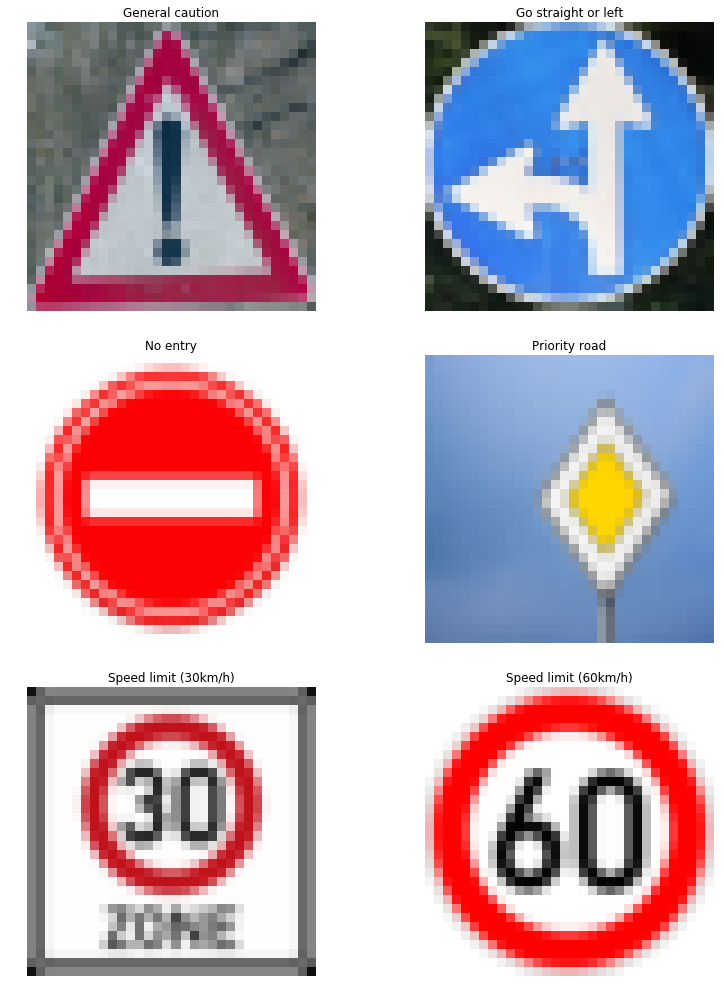

In [15]:
# Iterate over the new german sign images folder and put all the images to a list
import os
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import re

print("Images added from the internet")
my_images = []
my_labels = np.array([18, 37, 17, 12, 1, 3])
figures = {}
labels = {}
index = 0
for root, dirnames, filenames in os.walk("./new_german_sign_images"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (32, 32))
            my_images.append(image_resized)
            figures[index] = image_resized
            labels[index] = name_values[my_labels[index]][1].decode('ascii')
            index += 1

plot_figures(figures, 3, 2, labels)

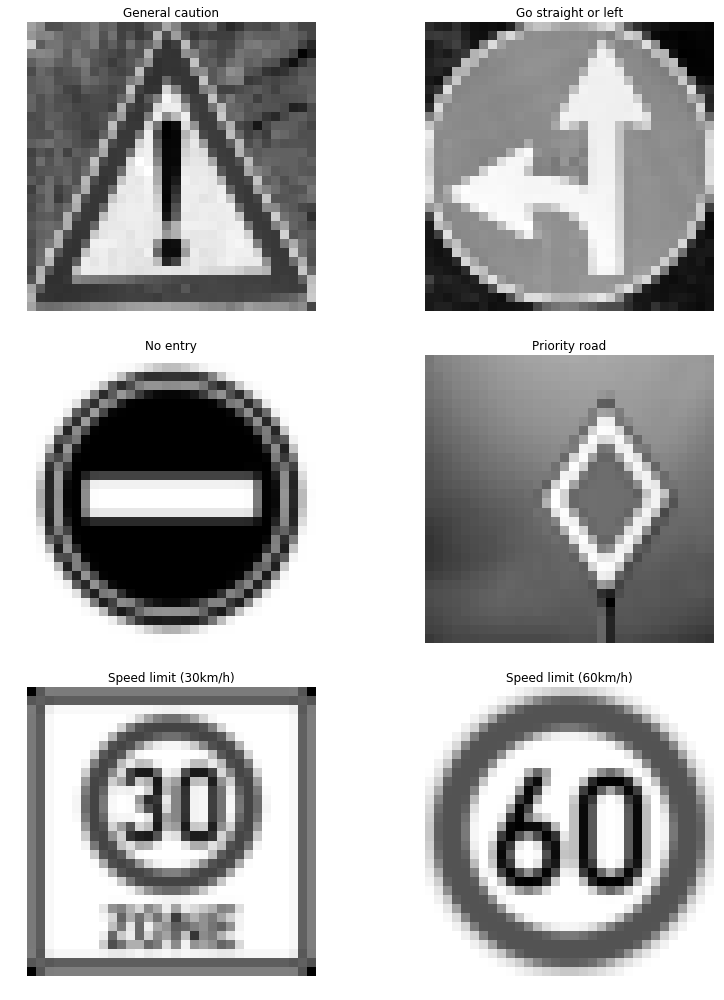

In [27]:
my_images = np.array(my_images)
my_images_gray = np.sum(my_images/3, axis=3, keepdims=True)
my_images_norm = my_images_gray/127.5-1

number_to_stop = 6
figures = {}
labels = {}
for i in range(number_to_stop):
    labels[i] = name_values[my_labels[i]][1].decode('ascii')
    figures[i] = my_images_norm[i].squeeze()
    
plot_figures(figures, 3, 2, labels)

### Predict the Sign Type for Each Image

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Results for new images")

my_single_item_array = []
my_single_item_label_array = []

for i in range(5):
    my_single_item_array.append(my_images_norm[i])
    my_single_item_label_array.append(my_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

Results for new images
Image 1
Image Accuracy = 1.000

Image 2
Image Accuracy = 1.000

Image 3
Image Accuracy = 1.000

Image 4
Image Accuracy = 0.750

Image 5
Image Accuracy = 0.600



### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k_size = 5
softmax_logits = tf.nn.softmax(logits)
predictions = tf.nn.top_k(softmax_logits, k=k_size, sorted=True, name='top5')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_norm, keep_prob: 1.0})
    my_predictions = sess.run(predictions, feed_dict={x: my_images_norm, keep_prob: 1.0})
    
    print(my_predictions)
    
#     for i in range(6):
#         figures = {}
#         labels = {}
        
#         figures[0] = my_images[i]
#         labels[0] = "Original"
        
#         for j in range(k_size):
#             labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_predictions[0][i][j])
#             figures[j+1] = X_valid[np.argwhere(y_valid == my_predictions[1][i][j])[0]].squeeze()
            
# #         print()
#         plot_figures(figures, 1, 6, labels)


TopKV2(values=array([[  1.00000000e+00,   5.03865612e-12,   8.33779661e-17,
          7.39377006e-21,   1.84696673e-22],
       [  1.00000000e+00,   6.96485022e-11,   3.47243306e-12,
          2.47048562e-12,   5.71196085e-13],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.60318744e-01,   1.28173027e-02,   1.13142189e-02,
          8.86808522e-03,   3.66448215e-03],
       [  9.99609411e-01,   3.62581806e-04,   2.34185918e-05,
          3.72416025e-06,   5.51261735e-07],
       [  9.75539804e-01,   2.44586617e-02,   5.77592971e-07,
          5.56590976e-07,   3.43704954e-07]], dtype=float32), indices=array([[18, 26, 27, 37,  1],
       [37, 35, 33, 26, 40],
       [17,  0,  1,  2,  3],
       [28, 29,  1,  3, 36],
       [28,  1,  0,  3, 29],
       [ 1,  0,  8,  5,  6]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.